In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Pharmacokinetic parameters
F = 0.8    # Bioavailability (fraction)
D = 1000   # Dose in mg
Ka = 1.4   # Absorption rate constant (1/hour)
Ke = 0.3   # Elimination rate constant (1/hour)
Vd = 91    # Volume of distribution (L)

In [3]:
# Create time array from 0 to 12 hours with 100 points
t = np.linspace(0, 12, 100)

# Calculate concentration at each time point
C = (F * D * Ka) / (Vd * (Ka - Ke)) * (np.exp(-Ke * t) - np.exp(-Ka * t))


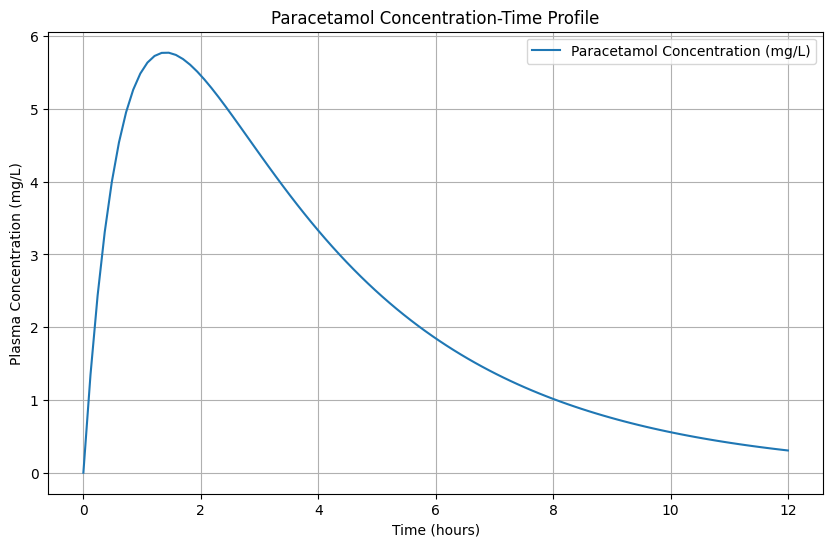

In [4]:
plt.figure(figsize=(10,6))
plt.plot(t, C, label='Paracetamol Concentration (mg/L)')
plt.title('Paracetamol Concentration-Time Profile')
plt.xlabel('Time (hours)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.legend()
plt.grid(True)
plt.show()


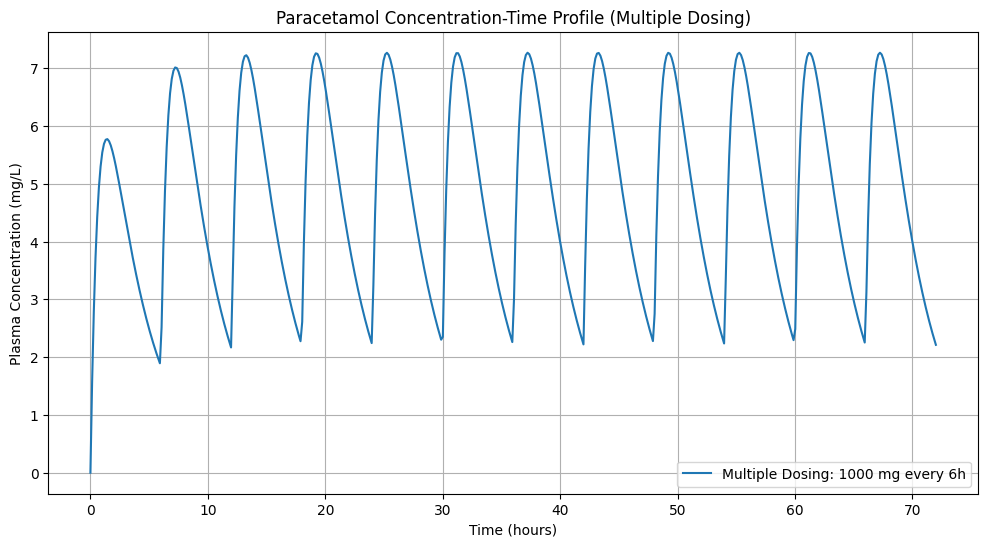

In [5]:
# Multiple dosing parameters
dose_interval = 6  # hours
total_time = 72    # hours (3 days)
time_points = np.linspace(0, total_time, 500)  # fine time points for smooth curve

# Initialize concentration array
C_multi = np.zeros_like(time_points)

# Calculate concentrations from each dose
dose_times = np.arange(0, total_time + dose_interval, dose_interval)

for t_dose in dose_times:
    # Calculate concentration contribution from this dose
    conc = (F * D * Ka) / (Vd * (Ka - Ke)) * (np.exp(-Ke * (time_points - t_dose)) - np.exp(-Ka * (time_points - t_dose)))
    # Concentrations only apply for times after dose administration
    conc[time_points < t_dose] = 0
    # Add to total concentration
    C_multi += conc

# Plot
plt.figure(figsize=(12,6))
plt.plot(time_points, C_multi, label='Multiple Dosing: 1000 mg every 6h')
plt.title('Paracetamol Concentration-Time Profile (Multiple Dosing)')
plt.xlabel('Time (hours)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.legend()
plt.grid(True)
plt.show()


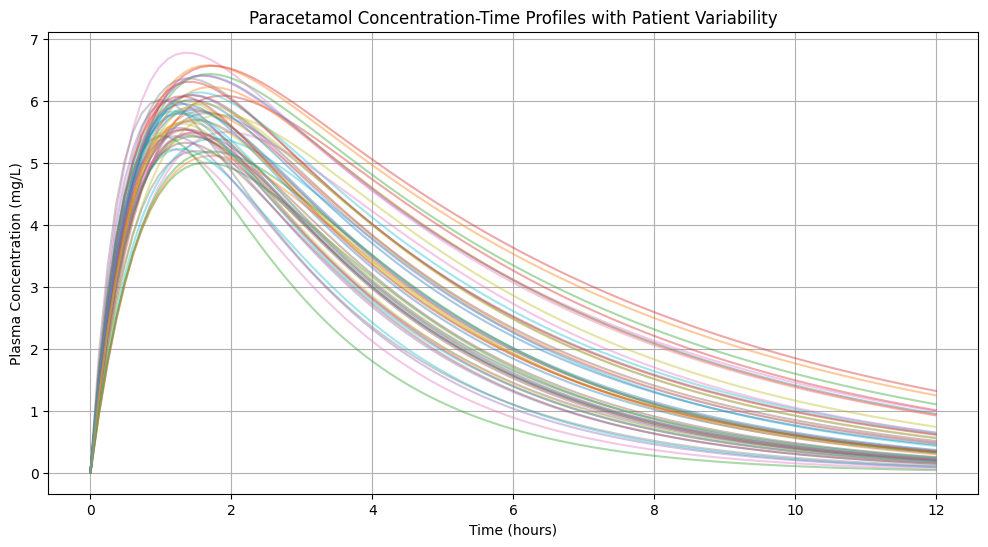

In [6]:
import seaborn as sns

# Number of virtual patients
n_patients = 50

# Mean and standard deviation for Ka and Ke (assumed 20% variability)
Ka_mean, Ka_sd = Ka, 0.2 * Ka
Ke_mean, Ke_sd = Ke, 0.2 * Ke

# Sample Ka and Ke values for each patient
Ka_samples = np.random.normal(Ka_mean, Ka_sd, n_patients)
Ke_samples = np.random.normal(Ke_mean, Ke_sd, n_patients)

# Time array (0 to 12 hours)
t = np.linspace(0, 12, 100)

# Calculate concentration for each patient
C_patients = []

for i in range(n_patients):
    Ka_i = Ka_samples[i]
    Ke_i = Ke_samples[i]
    conc = (F * D * Ka_i) / (Vd * (Ka_i - Ke_i)) * (np.exp(-Ke_i * t) - np.exp(-Ka_i * t))
    C_patients.append(conc)

C_patients = np.array(C_patients)

# Plot all patient curves
plt.figure(figsize=(12,6))
for i in range(n_patients):
    plt.plot(t, C_patients[i], alpha=0.4)

plt.title('Paracetamol Concentration-Time Profiles with Patient Variability')
plt.xlabel('Time (hours)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.grid(True)
plt.show()


In [7]:
from numpy import trapz

# Calculate Cmax and Tmax
Cmax = np.max(C)
Tmax = t[np.argmax(C)]

# Calculate AUC using trapezoidal integration
AUC = trapz(C, t)

print(f"Cmax = {Cmax:.2f} mg/L")
print(f"Tmax = {Tmax:.2f} hours")
print(f"AUC = {AUC:.2f} mg·h/L")


Cmax = 5.77 mg/L
Tmax = 1.45 hours
AUC = 28.27 mg·h/L


<ipython-input-7-1f2712bda7cb>:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AUC = trapz(C, t)


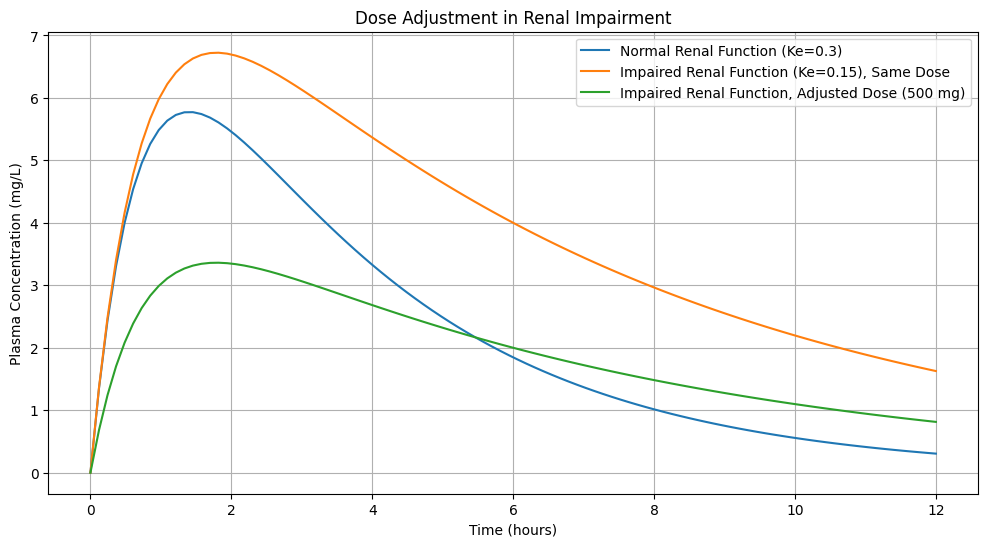

In [8]:
# Normal and impaired renal function Ke values
Ke_normal = 0.3
Ke_impaired = 0.15  # 50% reduction

# Time array
t = np.linspace(0, 12, 100)

# Concentration with normal renal function
C_normal = (F * D * Ka) / (Vd * (Ka - Ke_normal)) * (np.exp(-Ke_normal * t) - np.exp(-Ka * t))

# Concentration with impaired renal function (same dose)
C_impaired = (F * D * Ka) / (Vd * (Ka - Ke_impaired)) * (np.exp(-Ke_impaired * t) - np.exp(-Ka * t))

# Adjusted dose for impaired renal function to target similar exposure (50% dose)
D_adjusted = D * 0.5
C_adjusted = (F * D_adjusted * Ka) / (Vd * (Ka - Ke_impaired)) * (np.exp(-Ke_impaired * t) - np.exp(-Ka * t))

# Plot all
plt.figure(figsize=(12,6))
plt.plot(t, C_normal, label='Normal Renal Function (Ke=0.3)')
plt.plot(t, C_impaired, label='Impaired Renal Function (Ke=0.15), Same Dose')
plt.plot(t, C_adjusted, label='Impaired Renal Function, Adjusted Dose (500 mg)')
plt.xlabel('Time (hours)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.title('Dose Adjustment in Renal Impairment')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
from numpy import trapezoid

AUC_normal = trapezoid(C_normal, t)
AUC_impaired = trapezoid(C_impaired, t)

print(f"AUC Normal Renal Function: {AUC_normal:.2f} mg·h/L")
print(f"AUC Impaired Renal Function: {AUC_impaired:.2f} mg·h/L")
print(f"Fold increase in AUC due to impairment: {AUC_impaired/AUC_normal:.2f} times")



AUC Normal Renal Function: 28.27 mg·h/L
AUC Impaired Renal Function: 47.74 mg·h/L
Fold increase in AUC due to impairment: 1.69 times


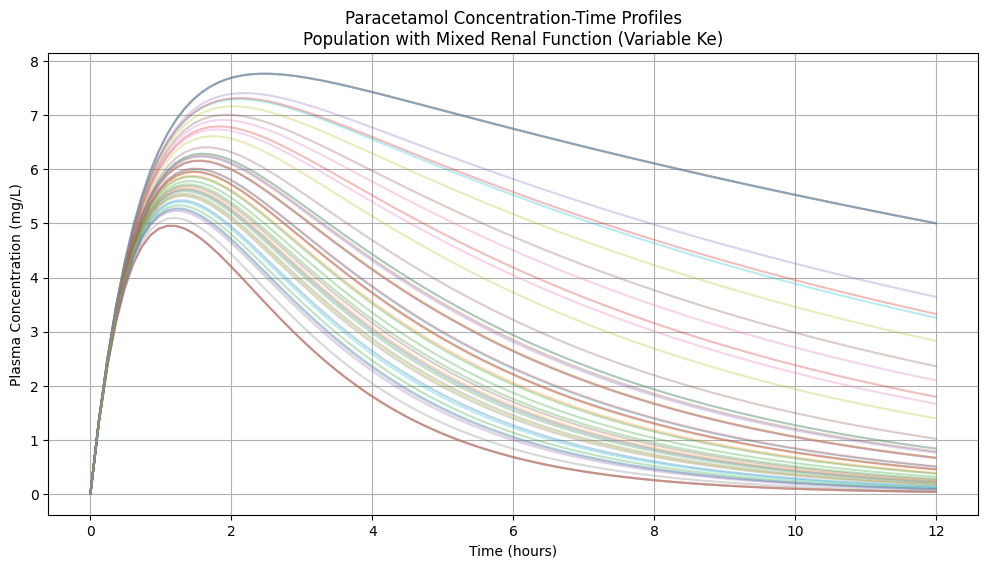

In [12]:
# Define a mixed population of 50 patients with variable Ke
np.random.seed(42)  # for reproducibility

# Mean Ke around 0.3, SD 0.15 (some normal, some impaired)
Ke_pop = np.random.normal(0.3, 0.15, 50)
# Bound values so Ke isn't negative or unrealistically high
Ke_pop = np.clip(Ke_pop, 0.05, 0.5)

# Time array
t = np.linspace(0, 12, 100)

# Simulate concentrations
C_pop = []

for Ke_i in Ke_pop:
    conc = (F * D * Ka) / (Vd * (Ka - Ke_i)) * (np.exp(-Ke_i * t) - np.exp(-Ka * t))
    C_pop.append(conc)

C_pop = np.array(C_pop)

# Plot population concentration profiles
plt.figure(figsize=(12,6))
for conc in C_pop:
    plt.plot(t, conc, alpha=0.3)

plt.title('Paracetamol Concentration-Time Profiles\nPopulation with Mixed Renal Function (Variable Ke)')
plt.xlabel('Time (hours)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.grid(True)
plt.show()


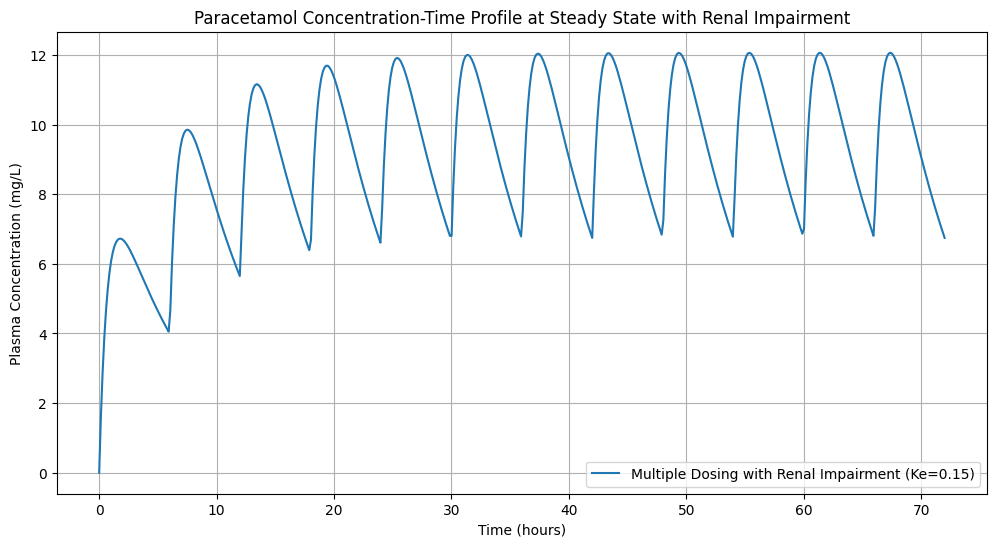

In [13]:
# Use impaired Ke for multiple dosing
Ke_imp = 0.15
dose_interval = 6
total_time = 72
time_points = np.linspace(0, total_time, 500)

C_multi_imp = np.zeros_like(time_points)
dose_times = np.arange(0, total_time + dose_interval, dose_interval)

for t_dose in dose_times:
    conc = (F * D * Ka) / (Vd * (Ka - Ke_imp)) * (np.exp(-Ke_imp * (time_points - t_dose)) - np.exp(-Ka * (time_points - t_dose)))
    conc[time_points < t_dose] = 0
    C_multi_imp += conc

# Plot
plt.figure(figsize=(12,6))
plt.plot(time_points, C_multi_imp, label='Multiple Dosing with Renal Impairment (Ke=0.15)')
plt.xlabel('Time (hours)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.title('Paracetamol Concentration-Time Profile at Steady State with Renal Impairment')
plt.legend()
plt.grid(True)
plt.show()
